In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [40]:
data = pd.read_csv('out/study2.csv')
data['FS'] = data['method'].apply(lambda x: x.split('_')[0][2])
data['HT'] = data['method'].apply(lambda x: x.split('_')[1][2])
data

,metric,mean,method,i,dataset,FS,HT
0,CCC,0.474946,FS0_HT0,0,simulated,0,0
1,MAE,0.614245,FS0_HT0,0,simulated,0,0
2,R2,0.303796,FS0_HT0,0,simulated,0,0
3,RMSE,0.759089,FS0_HT0,0,simulated,0,0
4,RMSPE,69.376054,FS0_HT0,0,simulated,0,0
...,...,...,...,...,...,...,...
63995,RMSE,6.316033,FS1_HT1,999,spectral,1,1
63996,RMSPE,0.129860,FS1_HT1,999,spectral,1,1
63997,RSR,1.014597,FS1_HT1,999,spectral,1,1
63998,r,0.205322,FS1_HT1,999,spectral,1,1


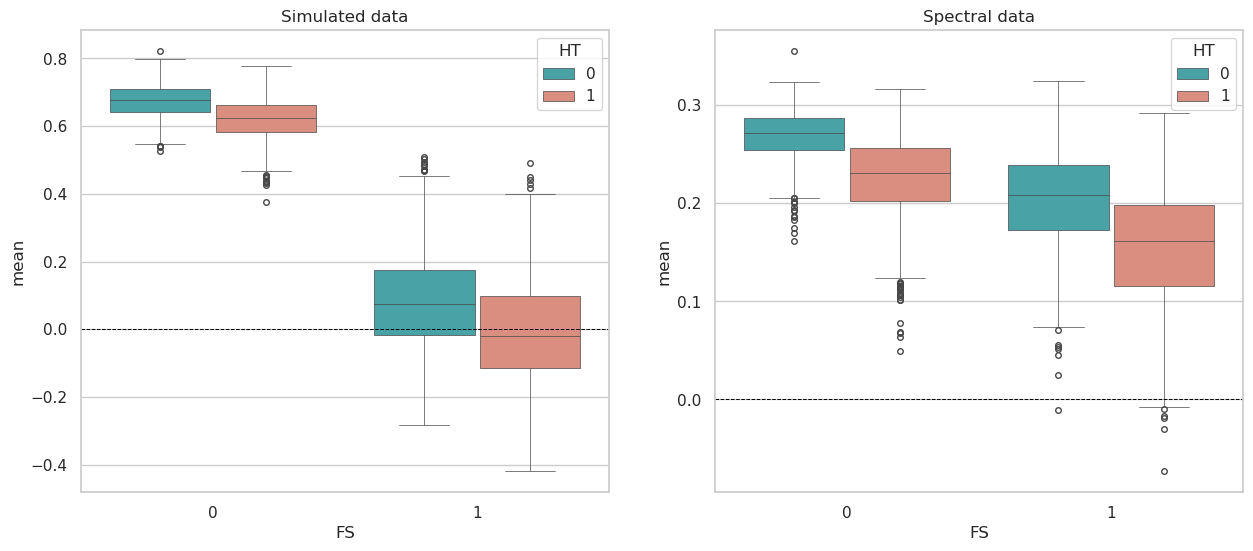

In [41]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#E88471"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, m in enumerate(["simulated", "spectral"]):
    sns.boxplot(
        data=data.query(f"dataset == '{m}' and metric == 'r'"),
        x="FS", y="mean",
        hue="HT",
        gap=0.05,
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[i],
    )
    axes[i].axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    axes[i].set_title(f"{m.capitalize()} data")

# axes[1].set_ylim(0.2, 0.4)